In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
import pandas as pd

# Path to the participants.tsv file
data_path = r"D:\ML dataset\dataset\participants.tsv"  # Use the correct path to your 'participants.tsv' file

# Load the dataset (TSV format)
df = pd.read_csv(data_path, sep='\t')

# Display the first few rows of the dataset
df.head()


In [ ]:
# Check for missing values in the dataset
print(df.isnull().sum())

# Handle missing values (dropping rows with missing data)
df = df.dropna()

# Encode the 'Group' column to numeric values (as it contains the labels)
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode the 'Group' column
df['Group'] = label_encoder.fit_transform(df['Group'])

# Display the first few rows with encoded labels
print(df['Group'].head())


In [ ]:
# Convert 'Gender' column to numeric values (Label Encoding)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Now drop 'Group' and 'participant_id' columns for features (and 'Group' is the label)
X = df.drop(['Group', 'participant_id'], axis=1)

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the numeric features
X_scaled = scaler.fit_transform(X)

# Check the scaled data
print(X_scaled[:5])  # Display the first 5 rows of scaled data


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shape of the resulting sets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


X_train_lstm shape: (800, 50, 1)
y_train shape: (800,)
X_test_lstm shape: (200, 50, 1)
y_test shape: (200,)
Training Teacher Model...


d:\ML dataset\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.3245 - loss: 1.1150 - val_accuracy: 0.3250 - val_loss: 1.0943
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3663 - loss: 1.0992 - val_accuracy: 0.2800 - val_loss: 1.1155
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.3194 - loss: 1.0991 - val_accuracy: 0.2700 - val_loss: 1.1053
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.3656 - loss: 1.0981 - val_accuracy: 0.3000 - val_loss: 1.1077
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.3629 - loss: 1.0964 - val_accuracy: 0.2800 - val_loss: 1.1038
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.3700 - loss: 1.0869 - val_accuracy: 0.3150 - val_loss: 1.1035
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.3687 - loss: 1.1007 - val_accuracy: 0.3350 - val_loss: 1.1246
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.3815 - loss: 1.0898 - val_accuracy: 0.2650 

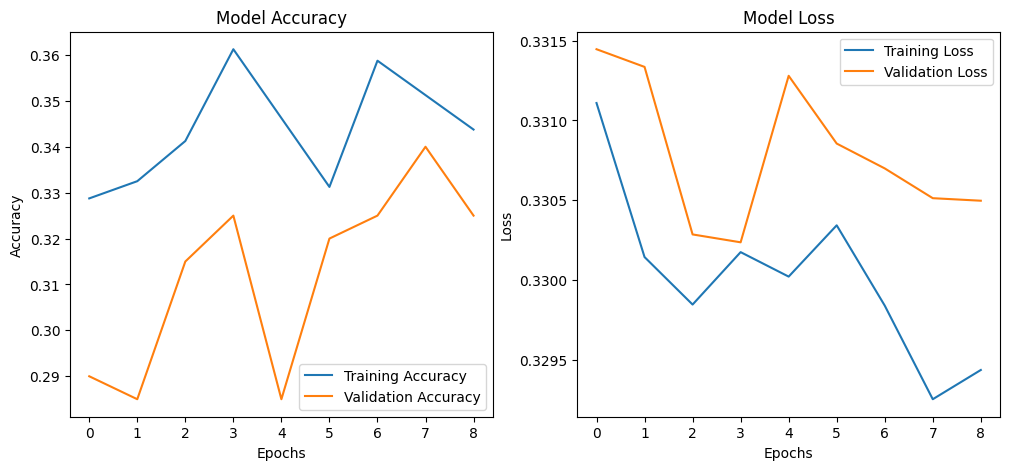

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step


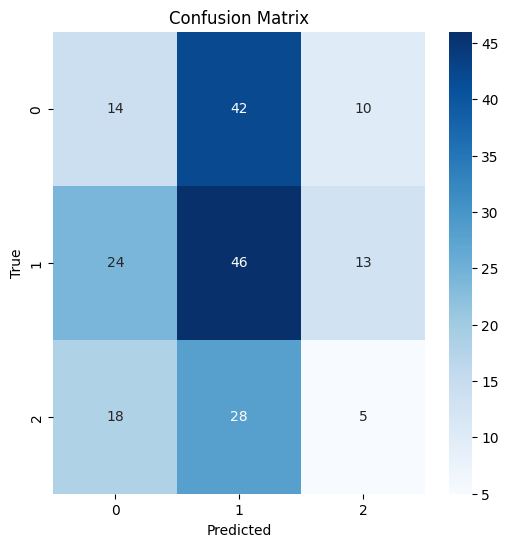

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.25      0.21      0.23        66
     Class 1       0.40      0.55      0.46        83
     Class 2       0.18      0.10      0.13        51

    accuracy                           0.33       200
   macro avg       0.28      0.29      0.27       200
weighted avg       0.29      0.33      0.30       200



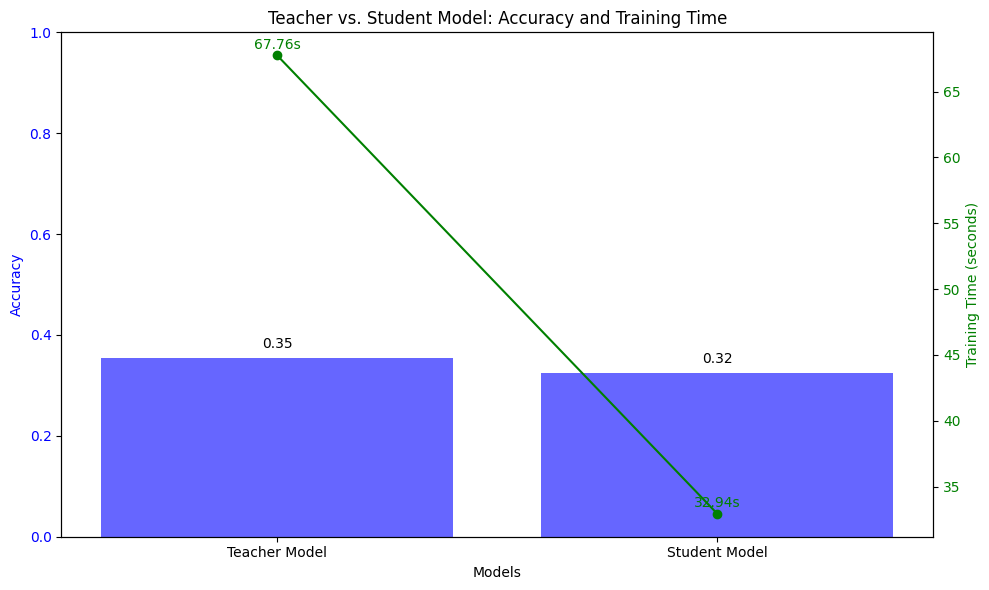

In [ ]:
#LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time

# === Step 1: Generate or Load Data ===
# Example: Generate synthetic data for demonstration
num_samples = 1000
timesteps = 50
num_features = 1
num_classes = 3

# Random time-series data
X = np.random.rand(num_samples, timesteps, num_features)
# Random labels (3 classes)
y = np.random.randint(0, num_classes, size=num_samples)

# Split data into training and testing sets
X_train_lstm, X_test_lstm, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train_lstm = scaler.fit_transform(X_train_lstm.reshape(-1, X_train_lstm.shape[-1])).reshape(X_train_lstm.shape)
X_test_lstm = scaler.transform(X_test_lstm.reshape(-1, X_test_lstm.shape[-1])).reshape(X_test_lstm.shape)

# Verify shapes
print("X_train_lstm shape:", X_train_lstm.shape)  # (800, 50, 1)
print("y_train shape:", y_train.shape)            # (800,)
print("X_test_lstm shape:", X_test_lstm.shape)    # (200, 50, 1)
print("y_test shape:", y_test.shape)              # (200,)

# === Step 2: Define Teacher Model ===
teacher = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])
teacher.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the teacher model and measure training time
print("Training Teacher Model...")
start_time_teacher = time.time()  # Start timer for teacher model
teacher.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))
training_time_teacher = time.time() - start_time_teacher  # End timer for teacher model
print(f"Teacher Model Training Time: {training_time_teacher:.2f} seconds")

# === Step 3: Precompute Teacher Predictions ===
print("Precomputing Teacher Predictions...")
teacher_logits = teacher.predict(X_train_lstm)

# === Step 4: Define Student Model ===
student = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# === Step 5: Distillation Loss ===
temperature = 3.0
alpha = 0.7

def distillation_loss(y_true, y_pred):
    teacher_probs = tf.nn.softmax(teacher_logits / temperature)
    student_probs = tf.nn.softmax(y_pred / temperature)
    
    # Ensure batch sizes match
    teacher_probs = teacher_probs[:tf.shape(y_pred)[0]]
    
    # Distillation loss = alpha * KL divergence + (1 - alpha) * cross-entropy
    return alpha * tf.keras.losses.KLDivergence()(teacher_probs, student_probs) + (1 - alpha) * tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

# === Step 6: Compute Class Weights ===
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# === Step 7: Compile Student Model ===
optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)  # Lower learning rate and gradient clipping
student.compile(optimizer=optimizer, loss=distillation_loss, metrics=['accuracy'])

# === Step 8: Learning Rate Scheduler ===
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure the return value is a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure the return value is a float

# === Step 9: Train Student Model with Early Stopping ===
print("Training Student Model...")
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_callback = LearningRateScheduler(lr_scheduler)

# Measure training time for student model
start_time_student = time.time()  # Start timer for student model
history = student.fit(X_train_lstm, y_train, epochs=50, batch_size=32, 
                      validation_data=(X_test_lstm, y_test), callbacks=[early_stopping, lr_callback], class_weight=class_weight_dict)
training_time_student = time.time() - start_time_student  # End timer for student model
print(f"Student Model Training Time: {training_time_student:.2f} seconds")

# === Step 10: Plot Training Graphs ===
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# === Step 11: Evaluate Model and Output Confusion Matrix + Classification Report ===
y_pred = student.predict(X_test_lstm)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred_classes, target_names=[f'Class {i}' for i in np.unique(y_train)])
print('Classification Report:\n', cr)

# === Step 12: Bar Plot for Teacher vs. Student Model Comparison ===
# Extract metrics
teacher_accuracy = teacher.evaluate(X_test_lstm, y_test, verbose=0)[1]
student_accuracy = student.evaluate(X_test_lstm, y_test, verbose=0)[1]

# Data for plotting
models = ['Teacher Model', 'Student Model']
accuracy = [teacher_accuracy, student_accuracy]
training_time = [training_time_teacher, training_time_student]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for accuracy
ax1.bar(models, accuracy, color='blue', alpha=0.6, label='Accuracy')
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, 1.0)  # Accuracy ranges from 0 to 1

# Add text labels for accuracy
for i, acc in enumerate(accuracy):
    ax1.text(i, acc + 0.02, f'{acc:.2f}', ha='center', color='black')

# Second y-axis for training time
ax2 = ax1.twinx()
ax2.plot(models, training_time, color='green', marker='o', label='Training Time (s)')
ax2.set_ylabel('Training Time (seconds)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add text labels for training time
for i, time in enumerate(training_time):
    ax2.text(i, time + 0.5, f'{time:.2f}s', ha='center', color='green')

# Title and layout
plt.title('Teacher vs. Student Model: Accuracy and Training Time')
fig.tight_layout()
plt.show()

Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_15844\3232177221.py:43: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
d:\ML dataset\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 546ms/step - accuracy: 0.3205 - loss: 1.1101 - val_accuracy: 0.3333 - val_loss: 1.1081
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.3479 - loss: 1.1207 - val_accuracy: 0.4444 - val_loss: 1.1077
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.3355 - loss: 1.0915 - val_accuracy: 0.3333 - val_loss: 1.1064
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3797 - loss: 1.0941 - val_accuracy: 0.3889 - val_loss: 1.1089
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4038 - loss: 1.0903 - val_accuracy: 0.3889 - val_loss: 1.1064
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.3758 - loss: 1.0976 - val_accuracy: 0.3889 - val_loss: 1.1022
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.3362 - loss: 1.0858 - val_accuracy: 0.3889 - val_loss: 1.0949
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3426 - loss: 1.0980 - val_accuracy: 0.3333 - val_loss: 1.087

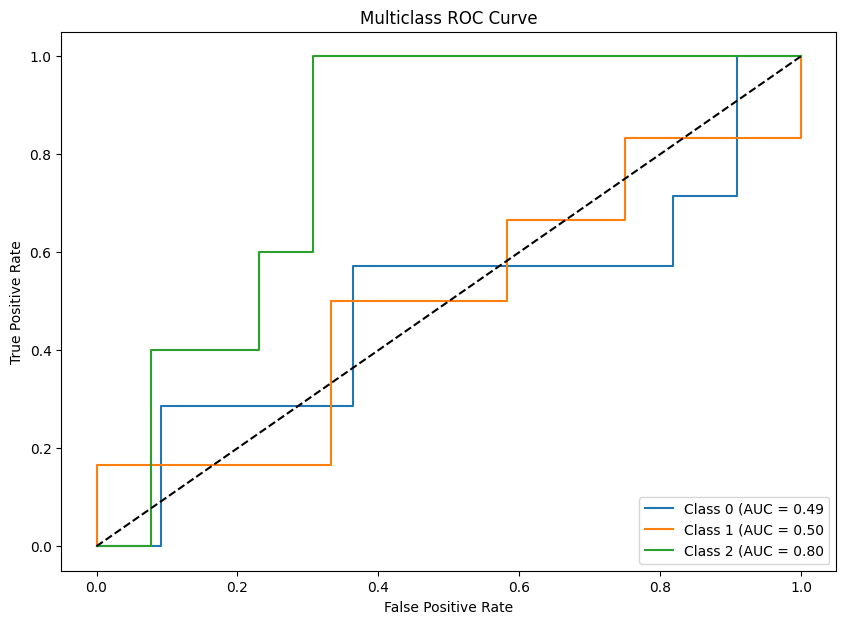

In [1]:
#CNN + LSTM WITH SPARSE LEARNING
import os
import time
import numpy as np
import pandas as pd
import mne
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 1: Load Dementia Labels ===
labels_path = r"D:\ML dataset\dataset\participants.tsv"
df_labels = pd.read_csv(labels_path, sep="\t")

# Encode labels as numbers (A=0, C=1, F=2)
label_encoder = LabelEncoder()
df_labels["Group"] = label_encoder.fit_transform(df_labels["Group"])
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Create a dictionary mapping participant_id to Group
label_dict = dict(zip(df_labels["participant_id"], df_labels["Group"]))

# === Step 2: Extract EEG Features ===
data_dir = r"D:\ML dataset\dataset\derivatives"
eeg_features = []
eeg_labels = []

for participant_id, label in label_dict.items():
    eeg_file = os.path.join(data_dir, participant_id, "eeg", f"{participant_id}_task-eyesclosed_eeg.set")
    
    if not os.path.exists(eeg_file):
        print(f"Missing EEG file: {eeg_file}")
        continue  # Skip missing files

    # Load EEG data
    raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
    
    # Extract data (Shape: [n_channels, n_samples])
    eeg_data = raw.get_data()

    # Feature Extraction: Mean, Std, Power Spectral Density (PSD)
    mean_values = np.mean(eeg_data, axis=1)  # Mean per channel
    std_values = np.std(eeg_data, axis=1)  # Standard Deviation per channel
    psd, _ = mne.time_frequency.psd_array_welch(eeg_data, sfreq=raw.info["sfreq"])

    # Combine features (Concatenated)
    features = np.hstack([mean_values, std_values, np.mean(psd, axis=1)])
    eeg_features.append(features)
    eeg_labels.append(label)  # Append numeric label

# Convert to numpy arrays
X = np.array(eeg_features)
y = np.array(eeg_labels)

# === Step 3: Data Splitting & Preprocessing ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for CNN-LSTM (samples, time steps, features)
X_train_comb = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_comb = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# === Step 4: Compute Class Weights for Imbalance ===
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# === Step 5: Define CNN + LSTM Model ===
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_comb.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Reshape((-1, 128)),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
history = model.fit(
    X_train_comb, y_train, 
    epochs=10, batch_size=32, 
    validation_data=(X_test_comb, y_test),
    class_weight=class_weight_dict
)
training_time = time.time() - start_time

# === Step 6: Evaluation ===
y_pred_prob = model.predict(X_test_comb)
y_pred = np.argmax(y_pred_prob, axis=1)

# ROC Curve
plt.figure(figsize=(10, 7))
for i in range(len(np.unique(y))):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_16228\3412390316.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Epoch 10, Loss: 0.9842320084571838
Epoch 20, Loss: 0.8882296681404114
Epoch 30, Loss: 0.7632541656494141
Epoch 40, Loss: 0.6051872968673706
Epoch 50, Loss: 0.45005157589912415


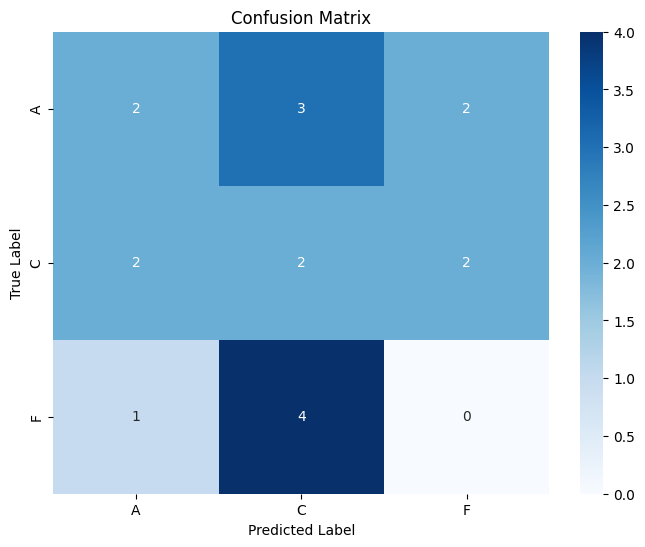

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.22      0.33      0.27         6
           2       0.00      0.00      0.00         5

    accuracy                           0.22        18
   macro avg       0.21      0.21      0.20        18
weighted avg       0.23      0.22      0.22        18



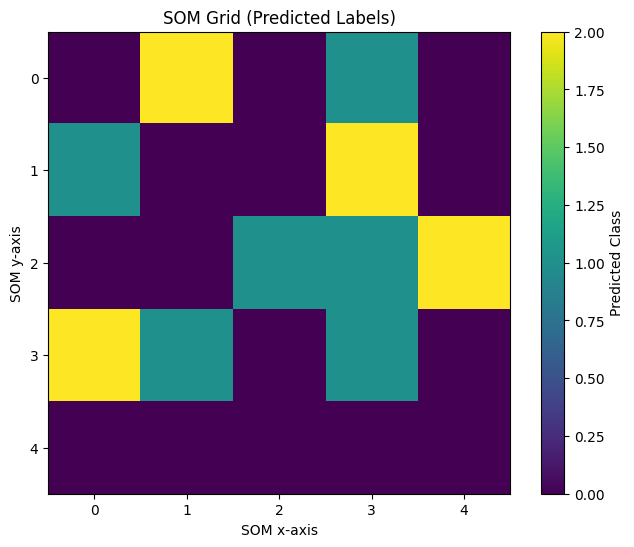

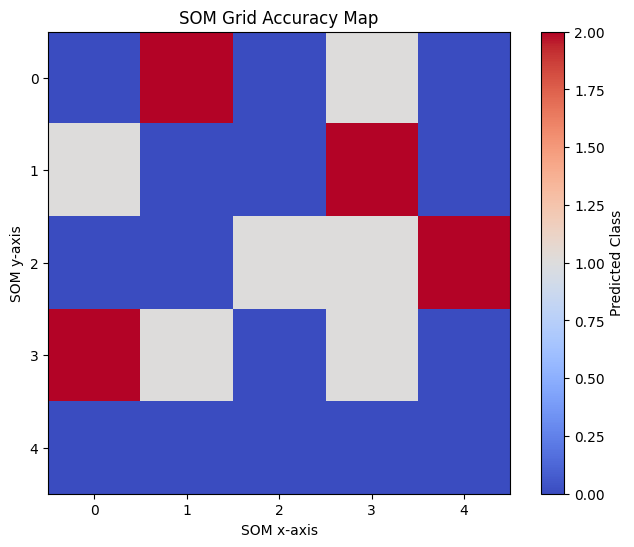

In [11]:
# SOM MODEL WITH KNOWLEGDE
import os
import time
import numpy as np
import pandas as pd
import mne
from minisom import MiniSom
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# === Step 1: Load Dementia Labels ===
labels_path = r"D:\ML dataset\dataset\participants.tsv"
df_labels = pd.read_csv(labels_path, sep="\t")

# Encode labels as numbers (A=0, C=1, F=2)
label_encoder = LabelEncoder()
df_labels["Group"] = label_encoder.fit_transform(df_labels["Group"])

# Create a dictionary mapping participant_id to Group
label_dict = dict(zip(df_labels["participant_id"], df_labels["Group"]))

# === Step 2: Extract EEG Features ===
data_dir = r"D:\ML dataset\dataset\derivatives"
eeg_features = []
eeg_labels = []

for participant_id, label in label_dict.items():
    eeg_file = os.path.join(data_dir, participant_id, "eeg", f"{participant_id}_task-eyesclosed_eeg.set")
    
    if not os.path.exists(eeg_file):
        print(f"Missing EEG file: {eeg_file}")
        continue

    raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
    eeg_data = raw.get_data()
    
    mean_values = np.mean(eeg_data, axis=1)
    std_values = np.std(eeg_data, axis=1)
    psd, _ = mne.time_frequency.psd_array_welch(eeg_data, sfreq=raw.info["sfreq"])
    features = np.hstack([mean_values, std_values, np.mean(psd, axis=1)])
    eeg_features.append(features)
    eeg_labels.append(label)

X = np.array(eeg_features)
y = np.array(eeg_labels)

# === Step 3: Data Splitting & Preprocessing ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === Step 4: Teacher Model (Neural Network) ===

class EEGClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(EEGClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.log_softmax(self.fc3(x), dim=1)

# Initialize teacher model
teacher_model = EEGClassifier(input_size=X_train.shape[1], num_classes=len(np.unique(y)))

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(teacher_model.parameters(), lr=0.001)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

# Train the teacher model
teacher_model.train()
for epoch in range(50):  # Number of epochs
    optimizer.zero_grad()
    outputs = teacher_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# === Step 5: Distillation (Train SOM using soft targets from teacher model) ===

# Get soft targets (probabilities) from the teacher model
teacher_model.eval()
with torch.no_grad():
    soft_targets = teacher_model(X_train_tensor)
    soft_targets = torch.exp(soft_targets)  # Convert log-softmax to probabilities

# === Step 6: Initialize and Train SOM (with distillation) ===
som = MiniSom(x=5, y=5, input_len=X_train.shape[1], sigma=1.0, learning_rate=0.5)

# Measure training time for SOM
start_time = time.time()  # Start timer

# Train the SOM using soft targets
som.train_random(X_train, num_iteration=100)

training_time = time.time() - start_time  # End timer and calculate training time

# Map the soft targets (probabilities) from the teacher to the SOM grid
label_map = np.zeros((5, 5), dtype=int)
for i, x in enumerate(X_train):
    winner = som.winner(x)
    predicted_class = torch.argmax(soft_targets[i]).item()
    label_map[winner] = predicted_class

y_pred = np.array([label_map[som.winner(x)] for x in X_test])

# === Step 7: Confusion Matrix ===
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# === Step 8: Classification Report ===
print("Classification Report:")
print(classification_report(y_test, y_pred))

## === Step 9: Add Graph for SOM Performance ===

# Visualize SOM grid with class labels
plt.figure(figsize=(8, 6))

# Create a color map based on the predicted labels
plt.imshow(label_map, cmap='viridis', interpolation='nearest')
plt.title("SOM Grid (Predicted Labels)")
plt.colorbar(label='Predicted Class')
plt.xlabel('SOM x-axis')
plt.ylabel('SOM y-axis')
plt.show()

# Visualize SOM grid with accuracy for each cell (if you want to show how well the grid is learning)
# This is useful for inspecting how well the SOM is able to cluster the data

accuracy_map = np.zeros((5, 5))

for i, x in enumerate(X_train):
    winner = som.winner(x)
    predicted_class = torch.argmax(soft_targets[i]).item()
    accuracy_map[winner] = predicted_class

plt.figure(figsize=(8, 6))
plt.imshow(accuracy_map, cmap='coolwarm', interpolation='nearest')
plt.title("SOM Grid Accuracy Map")
plt.colorbar(label='Predicted Class')
plt.xlabel('SOM x-axis')
plt.ylabel('SOM y-axis')
plt.show()


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)
Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Effective window size : 0.512 (s)


C:\Users\wacy\AppData\Local\Temp\ipykernel_5660\1169489153.py:41: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(eeg_file, preload=True)


Epoch 10, Loss: 0.9330475330352783
Epoch 20, Loss: 0.8825346827507019
Epoch 30, Loss: 0.7412460446357727
Epoch 40, Loss: 0.28734830021858215
Epoch 50, Loss: 0.15967826545238495


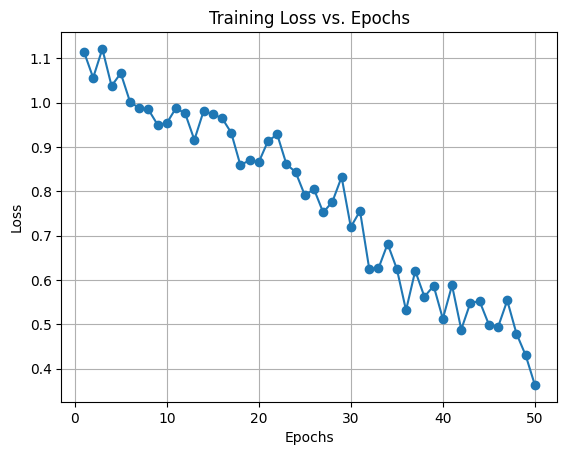

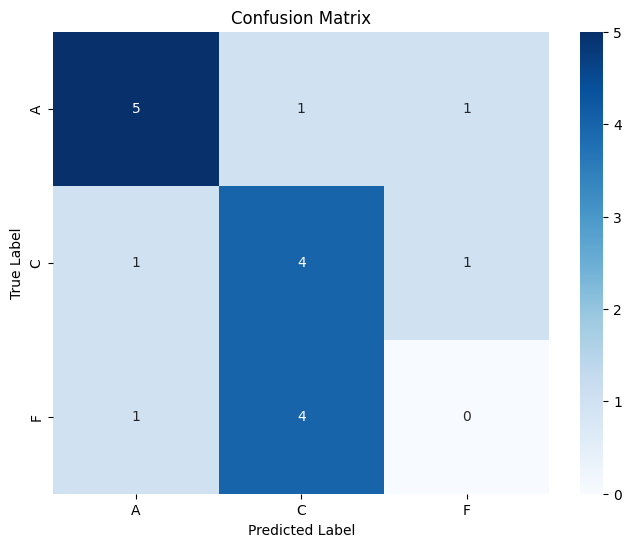

Classification Report:
              precision    recall  f1-score   support

           A       0.71      0.71      0.71         7
           C       0.44      0.67      0.53         6
           F       0.00      0.00      0.00         5

    accuracy                           0.50        18
   macro avg       0.39      0.46      0.42        18
weighted avg       0.43      0.50      0.46        18


--- CNN Model Performance ---
Accuracy: 0.5000
Precision: 0.4259
Recall: 0.5000
F1 Score: 0.4556
Training Time: 3.06 seconds
Learning Rate: 0.001


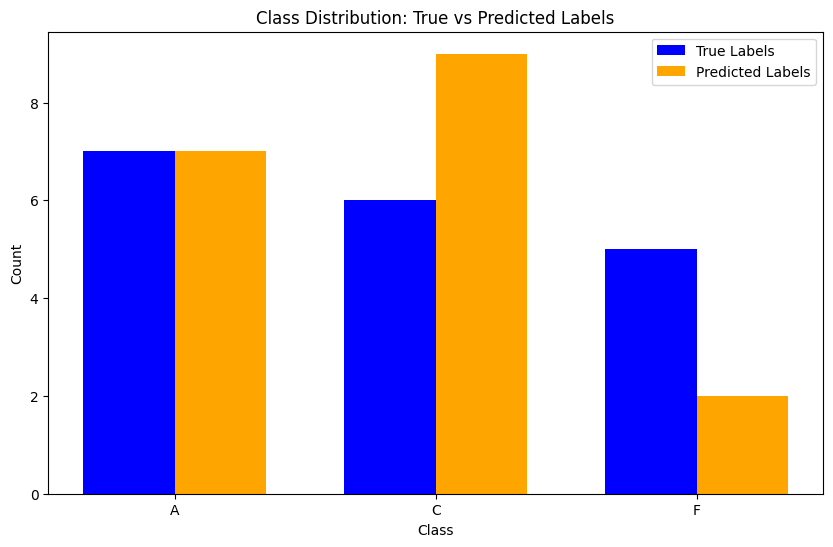

In [4]:
# CNN MODEL WITH SPARSE LEARNING
import os
import time
import numpy as np
import pandas as pd
import mne
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# === Step 1: Load Dementia Labels ===
labels_path = r"D:\ML dataset\dataset\participants.tsv"
df_labels = pd.read_csv(labels_path, sep="\t")

# Encode labels as numbers (A=0, C=1, F=2)
label_encoder = LabelEncoder()
df_labels["Group"] = label_encoder.fit_transform(df_labels["Group"])

# Create a dictionary mapping participant_id to Group
label_dict = dict(zip(df_labels["participant_id"], df_labels["Group"]))

# === Step 2: Extract EEG Features ===
data_dir = r"D:\ML dataset\dataset\derivatives"
eeg_features = []
eeg_labels = []

for participant_id, label in label_dict.items():
    eeg_file = os.path.join(data_dir, participant_id, "eeg", f"{participant_id}_task-eyesclosed_eeg.set")
    
    if not os.path.exists(eeg_file):
        print(f"Missing EEG file: {eeg_file}")
        continue

    raw = mne.io.read_raw_eeglab(eeg_file, preload=True)
    eeg_data = raw.get_data()
    
    mean_values = np.mean(eeg_data, axis=1)
    std_values = np.std(eeg_data, axis=1)
    psd, _ = mne.time_frequency.psd_array_welch(eeg_data, sfreq=raw.info["sfreq"])
    features = np.hstack([mean_values, std_values, np.mean(psd, axis=1)])
    eeg_features.append(features)
    eeg_labels.append(label)

X = np.array(eeg_features)
y = np.array(eeg_labels)

# === Step 3: Data Splitting & Preprocessing ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for CNN input (batch_size, channels, height, width)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], 1)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# === Step 4: CNN Model with Sparse Learning ===
class SparseCNN(nn.Module):
    def __init__(self, input_channels, num_features, num_classes):
        super(SparseCNN, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0))
        self.conv2 = nn.Conv2d(32, 64, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0))
        self.pool = nn.MaxPool2d(kernel_size=(2, 1))
        
        self.flattened_size = self._get_flattened_size(num_features)
        
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)
    
    def _get_flattened_size(self, num_features):
        with torch.no_grad():
            x = torch.zeros(1, 1, num_features, 1)
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            return x.view(1, -1).shape[1]
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        return F.log_softmax(self.fc2(x), dim=1)

cnn_model = SparseCNN(input_channels=1, num_features=X_train.shape[2], num_classes=len(np.unique(y)))

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Training loop with loss tracking
losses = []
start_time = time.time()
cnn_model.train()
for epoch in range(50):
    epoch_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = cnn_model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    losses.append(epoch_loss / len(train_loader))
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

training_time = time.time() - start_time

# Plot training loss
plt.plot(range(1, 51), losses, marker='o')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# === Step 5: Evaluation ===
cnn_model.eval()
with torch.no_grad():
    outputs = cnn_model(X_test_tensor)
    _, y_pred = torch.max(outputs, 1)
    y_pred = y_pred.numpy()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n--- CNN Model Performance ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Learning Rate: 0.001")

# === Step 6: Bar Plot for Class Distribution ===
# Get the counts of true and predicted labels
true_label_counts = np.bincount(y_test)
predicted_label_counts = np.bincount(y_pred)

# Plot the bar plot
plt.figure(figsize=(10, 6))
x = np.arange(len(label_encoder.classes_))  # Class labels
width = 0.35  # Width of the bars

# Plot true and predicted label counts
plt.bar(x - width/2, true_label_counts, width, label='True Labels', color='blue')
plt.bar(x + width/2, predicted_label_counts, width, label='Predicted Labels', color='orange')

# Add labels, title, and legend
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution: True vs Predicted Labels')
plt.xticks(x, label_encoder.classes_)
plt.legend()
plt.show()

d:\ML dataset\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Teacher Model...
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.3491 - loss: 1.1042 - val_accuracy: 0.3600 - val_loss: 1.1000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.3386 - loss: 1.1022 - val_accuracy: 0.3350 - val_loss: 1.1061
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.3435 - loss: 1.1039 - val_accuracy: 0.3400 - val_loss: 1.1085
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.3656 - loss: 1.0987 - val_accuracy: 0.4150 - val_loss: 1.0965
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.3532 - loss: 1.0976 - val_accuracy: 0.3750 - val_loss: 1.1059
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.3304 - loss: 1.1025 - val_accuracy: 0.3150 - val_loss: 1.1009
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.3566 - loss: 1.0966 - val_accuracy: 0.3150 - val_loss: 1.1000
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.3402 - loss: 

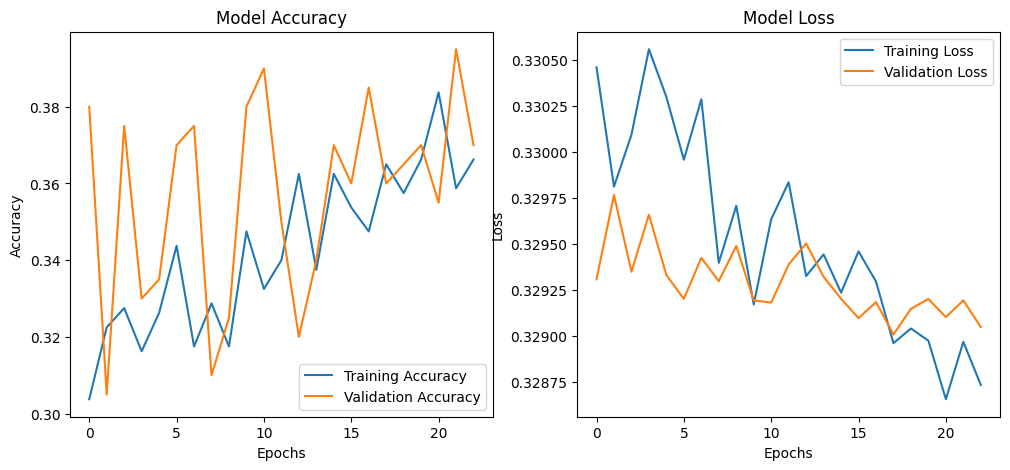

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step


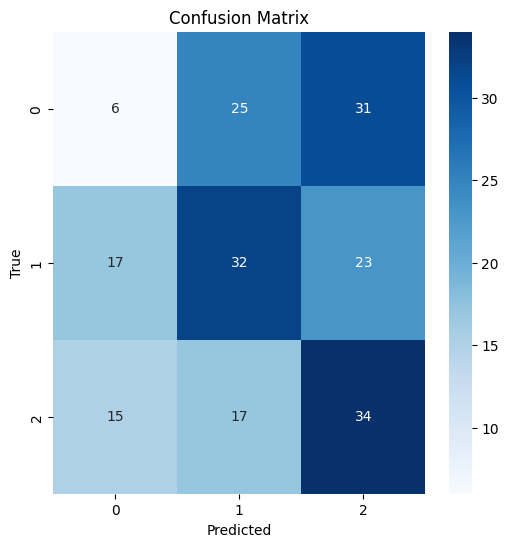

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.16      0.10      0.12        62
     Class 1       0.43      0.44      0.44        72
     Class 2       0.39      0.52      0.44        66

    accuracy                           0.36       200
   macro avg       0.33      0.35      0.33       200
weighted avg       0.33      0.36      0.34       200


--- Student Model Performance ---
Accuracy: 0.3600
Precision: 0.3321
Recall: 0.3600
F1 Score: 0.3407
Training Time: 91.88 seconds


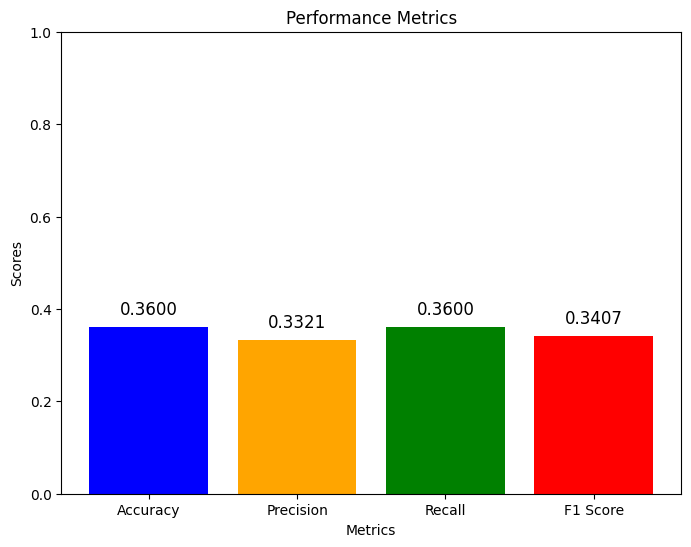

In [9]:
#GAT model
import os
import time
import numpy as np
import pandas as pd
import mne
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# === Step 1: Load Dementia Labels ===
labels_path = r"D:\ML dataset\dataset\participants.tsv"
df_labels = pd.read_csv(labels_path, sep="\t")

# Encode labels as numbers (A=0, C=1, F=2)
label_encoder = LabelEncoder()
df_labels["Group"] = label_encoder.fit_transform(df_labels["Group"])

# Create a dictionary mapping participant_id to Group
label_dict = dict(zip(df_labels["participant_id"], df_labels["Group"]))

# === Step 2: Define Teacher Model ===
teacher = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])
teacher.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the teacher model and measure training time
print("Training Teacher Model...")
start_time_teacher = time.time()  # Start timer for teacher model
teacher.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))
training_time_teacher = time.time() - start_time_teacher  # End timer for teacher model
print(f"Teacher Model Training Time: {training_time_teacher:.2f} seconds")

# === Step 3: Precompute Teacher Predictions ===
print("Precomputing Teacher Predictions...")
teacher_logits = teacher.predict(X_train_lstm)

# === Step 4: Define Student Model ===
student = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# === Step 5: Distillation Loss ===
temperature = 3.0
alpha = 0.7

def distillation_loss(y_true, y_pred):
    teacher_probs = tf.nn.softmax(teacher_logits / temperature)
    student_probs = tf.nn.softmax(y_pred / temperature)
    
    # Ensure batch sizes match
    teacher_probs = teacher_probs[:tf.shape(y_pred)[0]]
    
    # Distillation loss = alpha * KL divergence + (1 - alpha) * cross-entropy
    return alpha * tf.keras.losses.KLDivergence()(teacher_probs, student_probs) + (1 - alpha) * tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

# === Step 6: Compute Class Weights ===
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# === Step 7: Compile Student Model ===
optimizer = Adam(learning_rate=0.0001, clipvalue=1.0)  # Lower learning rate and gradient clipping
student.compile(optimizer=optimizer, loss=distillation_loss, metrics=['accuracy'])

# === Step 8: Learning Rate Scheduler ===
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure the output is a float
    else:
        return float(lr * tf.math.exp(-0.1))  # Ensure the output is a float

# === Step 9: Train Student Model with Early Stopping ===
print("Training Student Model...")
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_callback = LearningRateScheduler(lr_scheduler)

# Measure training time for student model
start_time_student = time.time()  # Start timer for student model
history = student.fit(X_train_lstm, y_train, epochs=50, batch_size=32, 
                      validation_data=(X_test_lstm, y_test), callbacks=[early_stopping, lr_callback], class_weight=class_weight_dict)
training_time_student = time.time() - start_time_student  # End timer for student model
print(f"Student Model Training Time: {training_time_student:.2f} seconds")

# === Step 10: Plot Training Graphs ===
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# === Step 11: Evaluate Model and Output Confusion Matrix + Classification Report ===
y_pred = student.predict(X_test_lstm)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred_classes, target_names=[f'Class {i}' for i in np.unique(y_train)])
print('Classification Report:\n', cr)

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred_classes)  # Use y_pred_classes instead of y_pred
precision = precision_score(y_test, y_pred_classes, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred_classes, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred_classes, average='weighted')

print("\n--- Student Model Performance ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Training Time: {training_time_student:.2f} seconds")

# === Step 12: Performance Bar Graph ===
# Plotting performance metrics
performance_metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 6))
plt.bar(metric_names, performance_metrics, color=['blue', 'orange', 'green', 'red'])
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for normalized scores
for i, value in enumerate(performance_metrics):
    plt.text(i, value + 0.02, f'{value:.4f}', ha='center', va='bottom', fontsize=12)  # Displaying the values on top of bars
plt.show()
